# Voter System Proposal Simulation

Joshua Sanz, Robert Wang, Victor Han

In [1]:
# a bit of setup
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from VoterModel import VoterModel
from graphs import *

In [52]:
#er = erdos_renyi(50, 0.15)
#er = complete_graph(50)
#er = cycle(50)
er = torus_2d(10,5)

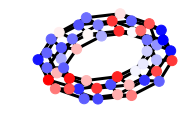

In [53]:
options = {
    'node_color': np.random.rand(50),
    'node_size': 100,
    'width': 3,
    'cmap': 'bwr'
}
plt.subplot(221)
nx.draw(er, **options)

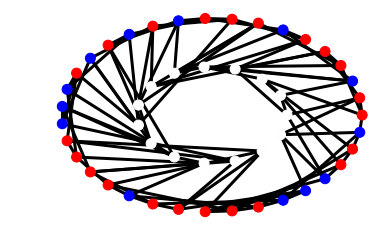

In [54]:
vm = VoterModel(graph = er, voting='simple', visualization='shell')
vm.initialize('all_rand')
vm.draw()

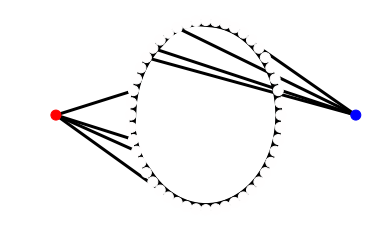

In [55]:
vm.initialize('rand_pair')
vm.draw()

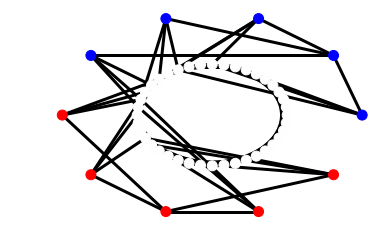

In [56]:
vm.update()
vm.draw()

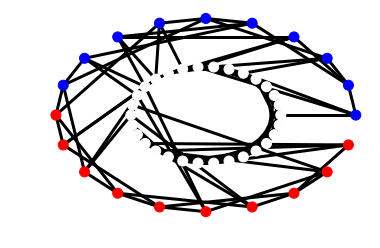

In [57]:
vm.update()
vm.draw()

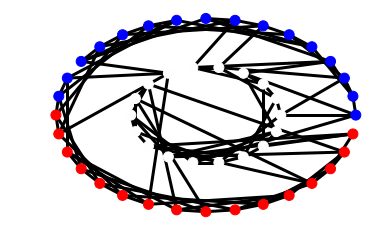

In [58]:
vm.update()
vm.draw()